In [ ]:
"""
Second round of text data cleaning.

1. Pre-processing

    - stemming/lemmatization.............................V

2. Understanding syntax or structure:
    
    - parts of speech (POS) tagging......................V
    - shallow parsing or chunking
    - constituency parsing/dependency parsing
    

3. Processing and functionality

    - named entity recognition (NER).....................V (may be useful)
    - create bi-grams or tri-grams.......................V
    - handle typos
    
    
Output to pickled df:
speech_clean_lemma (lemmatized tokens joined back as transcript)


"""

In [156]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


import re
import string

from sklearn.feature_extraction import text 
from sklearn.feature_extraction.text import CountVectorizer

import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer
from nltk.stem import WordNetLemmatizer

import spacy
# !pip install -U pip setuptools wheel
# !pip install -U spacy
# !python -m spacy download en_core_web_sm

from collections import Counter

from wordcloud import WordCloud


In [ ]:
# nltk.download()

## 1. Load data

In [2]:
speech_clean = pd.read_pickle('../dump/speech_clean')

## 2. Stemming / Lemmatization

### A. Stemming

In [3]:
# Create an object of class PorterStemmer
porter = PorterStemmer() # Uses Suffix Stripping (simplicity and speed)
lancaster = LancasterStemmer() # May over-stem

In [4]:
def stemSentence(text):
    token_words=word_tokenize(text)
    token_words
    stem_sentence=[]
    for word in token_words:
        stem_sentence.append(porter.stem(word))
        stem_sentence.append(" ")
    return "".join(stem_sentence)

In [5]:
speech_clean_2 = speech_clean.copy()
speech_clean_2['transcript'] = speech_clean['transcript'].apply(lambda x: stemSentence(x))

In [6]:
speech_clean_2

,speaker,year,transcript,length
0,SIDDHARTHA MUKHERJEE,2018,i wish someon had told me at my own commenc th...,14487
1,ABBY WAMBACK,2018,failur is not someth to be asham of it someth ...,15866
2,JON B. FISHER,2018,thank you veri much my father commenc speaker ...,8544
3,MINDY KALING,2018,good morn to the class of the faculti the pare...,15391
4,JESMYN WARD,2018,persist be patient be well good morn it is an ...,14063
...,...,...,...,...
436,CARRIE CHAPMAN,1936,i bring a messag to sweet briar colleg and esp...,22942
437,FRANKLIN D ROOSEVELT,1932,for me as for you thi is a day of honor attain...,16017
438,OPRAH WINFREY,1918,thank you walli annenberg and a special thank ...,15301
439,RALPH WALDO,1838,in thi refulg summer it ha been a luxuri to dr...,40403


In [7]:
# Document-Term Matrix based on speech_clean_2 (after stemming)
# columns: 39268 --> 31502
cv = CountVectorizer(stop_words='english')
data_cv = cv.fit_transform(speech_clean_2.transcript)

data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_dtm.index = speech_clean_2.index
data_dtm = data_dtm.iloc[:,:-1]
data_dtm

,aa,aahhhh,aaron,aback,abalthu,abandon,abat,abbi,abbot,abbrevi,...,ôi,ômay,ôsobrieti,ôtell,ôthe,ôwe,ôwhat,ôyou,ôyouõr,über
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,3,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
436,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
437,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
438,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
439,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Pickle
# data_dtm.to_pickle("../dump/data_dtm_2.pkl")

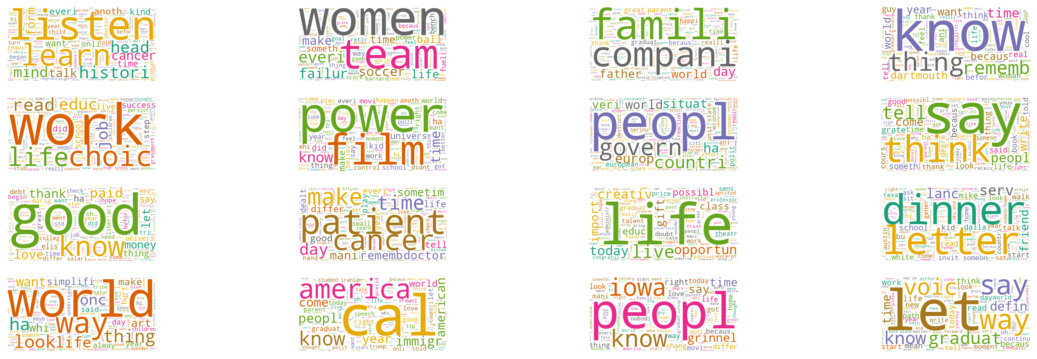

In [8]:
# Quickly check word clouds
from sklearn.feature_extraction import text 

data = data_dtm
# Find the top 30 words said in each speech
top_dict = {}
for c in data.columns:
    top = data[c].sort_values(ascending=False).head(30)
    top_dict[c]= list(zip(top.index, top.values))
    
words = []
for comedian in data.columns:
    top = [word for (word, count) in top_dict[comedian]]
    for t in top:
        words.append(t)

add_stop_words = ['like','youre','ive','im','really','id','ve','just','dont','thi','wa']
stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)
wc = WordCloud(stopwords=stop_words, background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42)

data = data_dtm.transpose()
# Reset the output dimensions
plt.rcParams['figure.figsize'] = [20, 8]

# full_names = ['Ali Wong', 'Anthony Jeselnik', 'Bill Burr', 'Bo Burnham', 'Dave Chappelle', 'Hasan Minhaj',
#               'Jim Jefferies', 'Joe Rogan', 'John Mulaney', 'Louis C.K.', 'Mike Birbiglia', 'Ricky Gervais']

# Create subplots for each comedian
for index, speech in enumerate(data.iloc[:,:16].columns):
    wc.generate(speech_clean_2.transcript[speech])
    
    plt.subplot(5, 4, index+1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
#     plt.title(full_names[index])
    
plt.show()

In [ ]:
# Stemming is not ideal for future viz. Only convenient for quick analysis.

### B. Lemmatization (with `nltk`)

In [9]:
from nltk.stem import WordNetLemmatizer

wordnet_lemmatizer = WordNetLemmatizer()

In [10]:
def lemmaSentence(text):
    token_words=word_tokenize(text)
    token_words
    lemma_sentence=[]
    for word in token_words:
        lemma_sentence.append(wordnet_lemmatizer.lemmatize(word, pos="v"))
        lemma_sentence.append(" ")
    return "".join(lemma_sentence)

In [11]:
speech_clean_3 = speech_clean.copy()
speech_clean_3['transcript'] = speech_clean['transcript'].apply(lambda x: lemmaSentence(x))

In [157]:
# Pickle
speech_clean_3.to_pickle('../dump/speech_clean_lemma')
speech_clean_3

,speaker,year,transcript,length
0,SIDDHARTHA MUKHERJEE,2018,i wish someone have tell me at my own commence...,14487
1,ABBY WAMBACK,2018,failure be not something to be ashamed of its ...,15866
2,JON B. FISHER,2018,thank you very much my father commencement spe...,8544
3,MINDY KALING,2018,good morning to the class of the faculty the p...,15391
4,JESMYN WARD,2018,persist be patient be well good morning it be ...,14063
...,...,...,...,...
436,CARRIE CHAPMAN,1936,i bring a message to sweet briar college and e...,22942
437,FRANKLIN D ROOSEVELT,1932,for me as for you this be a day of honorable a...,16017
438,OPRAH WINFREY,1918,thank you wallis annenberg and a special thank...,15301
439,RALPH WALDO,1838,in this refulgent summer it have be a luxury t...,40403


In [12]:
# Document-Term Matrix based on speech_clean_2 (after stemming)
# columns: 39268 --> 36167
cv = CountVectorizer(stop_words='english')
data_cv = cv.fit_transform(speech_clean_3.transcript)

data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_dtm.index = speech_clean_3.index
data_dtm = data_dtm.iloc[:,:-1]
data_dtm

,aa,aahhhh,aaron,aback,abalthus,abandon,abandonment,abate,abbot,abbreviation,...,ôi,ômay,ôsobriety,ôtell,ôthe,ôwe,ôwhat,ôyou,ôyouõre,über
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
436,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
437,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
438,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
439,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
# Quickly check word clouds
# Helpful for adding new stop words manually

data = data_dtm
# Find the top 30 words said in each speech
top_dict = {}
for c in data.columns:
    top = data[c].sort_values(ascending=False).head(30)
    top_dict[c]= list(zip(top.index, top.values))
    
words = []
for comedian in data.columns:
    top = [word for (word, count) in top_dict[comedian]]
    for t in top:
        words.append(t)

add_stop_words = ['like','youre','ive','im','really','id','ve','just','dont','thi','wa','say','know']
stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)
wc = WordCloud(stopwords=stop_words, background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42)

data = data_dtm.transpose()

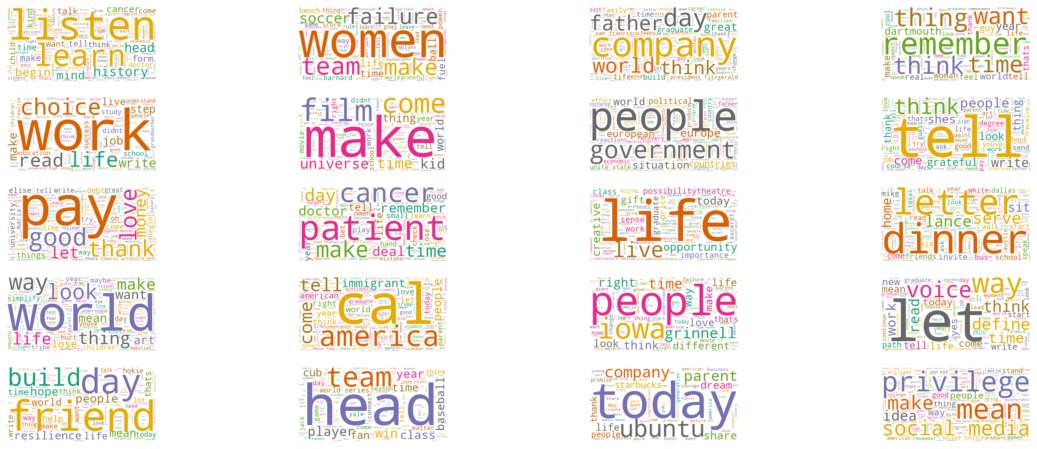

In [14]:
# Reset the output dimensions
plt.rcParams['figure.figsize'] = [20, 8]

# full_names = ['Ali Wong', 'Anthony Jeselnik', 'Bill Burr', 'Bo Burnham', 'Dave Chappelle', 'Hasan Minhaj',
#               'Jim Jefferies', 'Joe Rogan', 'John Mulaney', 'Louis C.K.', 'Mike Birbiglia', 'Ricky Gervais']

# Create subplots for each speech
for index, speech in enumerate(data.iloc[:,:20].columns):
    wc.generate(speech_clean_3.transcript[speech])
    
    plt.subplot(5, 4, index+1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
#     plt.title(full_names[index])
    
plt.show()

### B. Lemmatization (with `spacy`)

In [51]:
import spacy

def lemmaSpacy(text):
    nlp = spacy.load('en_core_web_sm')
    doc = nlp(text)
    lemmas = [token for token in doc]
    
    # Remove tokens that are not alphabetic
    a_lemmas = [lemma.text for lemma in lemmas if lemma.is_alpha and lemma.is_stop]
    
    return " ".join(a_lemmas)

In [58]:
import spacy

def lemmaSpacy(text):
    nlp = spacy.load('en_core_web_sm')
    doc = nlp(text)
    
    # Remove tokens that are not alphabetic
    tokens = [token.text for token in doc if token.is_alpha and token.is_stop]
    
    return " ".join(tokens)

In [52]:
import spacy

nlp = spacy.load("en_core_web_sm")
doc = nlp("Apple is looking at buying U.K. startup for $1 billion")

for token in doc:
    print(token.text, token.lemma_, token.pos_, token.tag_, token.dep_,
            token.shape_, token.is_alpha, token.is_stop)

Apple Apple PROPN NNP nsubj Xxxxx True False
is be AUX VBZ aux xx True True
looking look VERB VBG ROOT xxxx True False
at at ADP IN prep xx True True
buying buy VERB VBG pcomp xxxx True False
U.K. U.K. PROPN NNP dobj X.X. False False
startup startup NOUN NN advcl xxxx True False
for for ADP IN prep xxx True True
$ $ SYM $ quantmod $ False False
1 1 NUM CD compound d False False
billion billion NUM CD pobj xxxx True False


In [ ]:
speech_clean_4 = speech_clean.copy()
speech_clean_4['transcript'] = speech_clean['transcript'].apply(lambda x: lemmaSpacy(x))

In [ ]:
speech_clean_4

In [ ]:
# Document-Term Matrix based on speech_clean_2 (after stemming)
# columns: 39268 --> 36167
cv = CountVectorizer(stop_words='english')
data_cv = cv.fit_transform(speech_clean_4.transcript)

data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_dtm.index = speech_clean_4.index
data_dtm = data_dtm.iloc[:,:-1]
data_dtm

## 3. Part-Of-Speech (POS) Tagging
Categorizing words in a text (corpus) in correspondence with a particular part of speech, depending on the definition of the word and its context. Like adverb, verb (VB), noun (NN), determiner (DT), punctuation mark/sentence closer, etc.

Applications of POS tagging:
* Semantics
* Named entity recognition
* Co-reference resolution
* Speech recognition

### A. Using nltk
#### (`nltk.pos_tag`, `nltk.ne_chunk`)

In [ ]:
# Tokenize the article into sentences: sentences
sentences = sent_tokenize(article)

# Tokenize each sentence into words: token_sentences
token_sentences = [word_tokenize(sent) for sent in sentences]

# Tag each tokenized sentence into parts of speech: pos_sentences
pos_sentences = [nltk.pos_tag(sent) for sent in token_sentences] 

# Create the named entity chunks: chunked_sentences
chunked_sentences = nltk.ne_chunk_sents(pos_sentences,binary=True)

# Test for stems of the tree with 'NE' tags
for sent in chunked_sentences:
    for chunk in sent:
        if hasattr(chunk, "label") and chunk.label() == "NE":
            print(chunk)

In [60]:
def pos_nltk(text):
    
    # Tokenize the article into sentences: sentences
    sentences = sent_tokenize(article)

    # Tokenize each sentence into words: token_sentences
    token_sentences = [word_tokenize(sent) for sent in sentences]

    # Tag each tokenized sentence into parts of speech: pos_sentences
    pos_sentences = [nltk.pos_tag(sent) for sent in token_sentences] 

    # Create the named entity chunks: chunked_sentences
    chunked_sentences = nltk.ne_chunk_sents(pos_sentences,binary=True)

    # Test for stems of the tree with 'NE' tags
    for sent in chunked_sentences:
        for chunk in sent:
            if hasattr(chunk, "label") and chunk.label() == "NE":
                print(chunk)

In [103]:
article = speech_clean_3.transcript.iloc[0]
# article

In [104]:
pos_nltk(article)

In [105]:
# Tokenize the article into sentences: sentences
sentences = sent_tokenize(article)

# Tokenize each sentence into words: token_sentences
token_sentences = [word_tokenize(sent) for sent in sentences]

# Tag each tokenized sentence into parts of speech: pos_sentences
pos_sentences = [nltk.pos_tag(sent) for sent in token_sentences] 

# Create the named entity chunks: chunked_sentences
chunked_sentences = nltk.ne_chunk_sents(pos_sentences,binary=True)

# Test for stems of the tree with 'NE' tags
for sent in chunked_sentences:
    for chunk in sent:
        if hasattr(chunk, "label") and chunk.label() == "NE":
            print(chunk)

In [67]:
pos_sentences

[[('i', 'NN'),
  ('wish', 'VBP'),
  ('someone', 'NN'),
  ('have', 'VBP'),
  ('tell', 'VBN'),
  ('me', 'PRP'),
  ('at', 'IN'),
  ('my', 'PRP$'),
  ('own', 'JJ'),
  ('commencement', 'NN'),
  ('that', 'IN'),
  ('the', 'DT'),
  ('one', 'CD'),
  ('and', 'CC'),
  ('only', 'RB'),
  ('requirement', 'NN'),
  ('for', 'IN'),
  ('graduation', 'NN'),
  ('be', 'VB'),
  ('that', 'IN'),
  ('i', 'NN'),
  ('have', 'VBP'),
  ('to', 'TO'),
  ('emerge', 'VB'),
  ('out', 'IN'),
  ('of', 'IN'),
  ('the', 'DT'),
  ('close', 'JJ'),
  ('cordonedoff', 'NN'),
  ('space', 'NN'),
  ('of', 'IN'),
  ('my', 'PRP$'),
  ('own', 'JJ'),
  ('head', 'NN'),
  ('this', 'DT'),
  ('be', 'VB'),
  ('the', 'DT'),
  ('sole', 'JJ'),
  ('requirement', 'NN'),
  ('that', 'IN'),
  ('no', 'DT'),
  ('one', 'NN'),
  ('tell', 'VB'),
  ('me', 'PRP'),
  ('about', 'IN'),
  ('i', 'NNS'),
  ('have', 'VBP'),
  ('to', 'TO'),
  ('learn', 'VB'),
  ('to', 'TO'),
  ('listen', 'VB'),
  ('to', 'TO'),
  ('another', 'DT'),
  ('mind', 'NN'),
  ('to', 'TO')

### B. Using SpaCy library
#### (`nlp = spacy.load('en')`, `nlp.entity(doc)`, `doc.ents`, `doc.ents.text`, `doc.ents.label_`)

In [ ]:
import spacy

article = speech_clean_3.transcript.iloc[0]
nlp = spacy.load('en_core_web_sm')
doc = nlp(article)

#### * Counting

In [114]:
# Generate pos tags
pos = [(token.text, token.pos_) for token in doc]
pos_df = pd.DataFrame(pos,columns=['word','pos'])
pos_df.head()

,word,pos
0,i,PRON
1,wish,VERB
2,someone,PRON
3,have,AUX
4,tell,VERB


In [90]:
pos_df.pos.value_counts()

NOUN     573
VERB     411
PRON     319
DET      317
ADP      296
ADJ      179
ADV      133
CCONJ    108
PART      89
AUX       77
SCONJ     45
NUM       29
INTJ       7
X          1
PROPN      1
Name: pos, dtype: int64

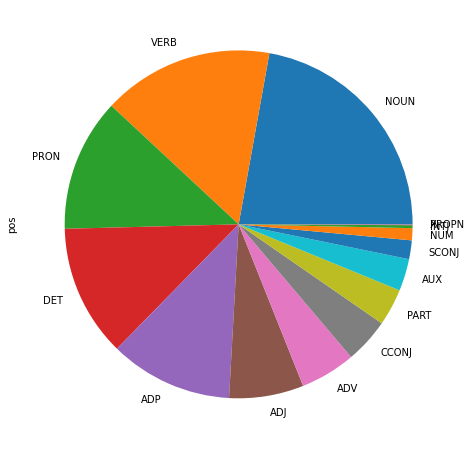

In [92]:
pos_df.pos.value_counts().plot(kind='pie');

In [95]:
def pos_pie(article):
    nlp = spacy.load('en_core_web_sm')
    doc = nlp(article)
    pos = [(token.text, token.pos_) for token in doc]
    pos_df = pd.DataFrame(pos,columns=['word','pos'])
    return pos_df.pos.value_counts().plot(kind='pie');

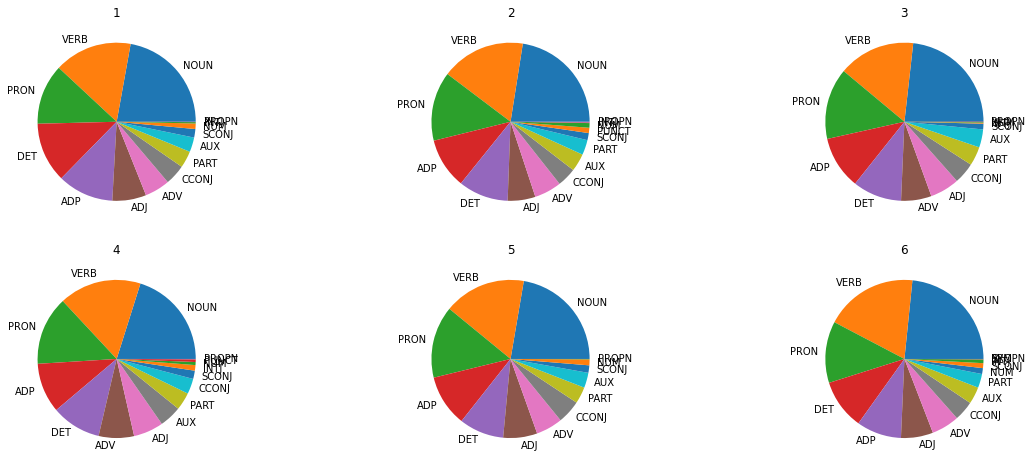

In [102]:
for index, speech in enumerate(speech_clean_3.transcript.iloc[:6]):
    plt.subplot(2, 3, index+1)
    pos_pie(speech)
    plt.title(index+1)
    
plt.show()

In [ ]:
# Distribution looks similar among different speeches

#### * Named Entity Recognition (NER)

In [113]:
# Generte named entities
ne = [(ent.text, ent.label_) for ent in doc.ents]
# print(ne)

In [108]:
ne_df = pd.DataFrame(ne,columns=['word','ent'])
ne_df.head()

,word,ent
0,last year,DATE
1,second,ORDINAL
2,one,CARDINAL
3,days,DATE
4,eight years old,DATE


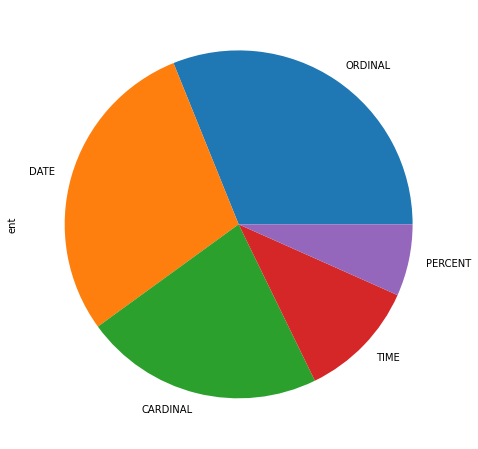

In [110]:
ne_df.ent.value_counts().plot(kind='pie');

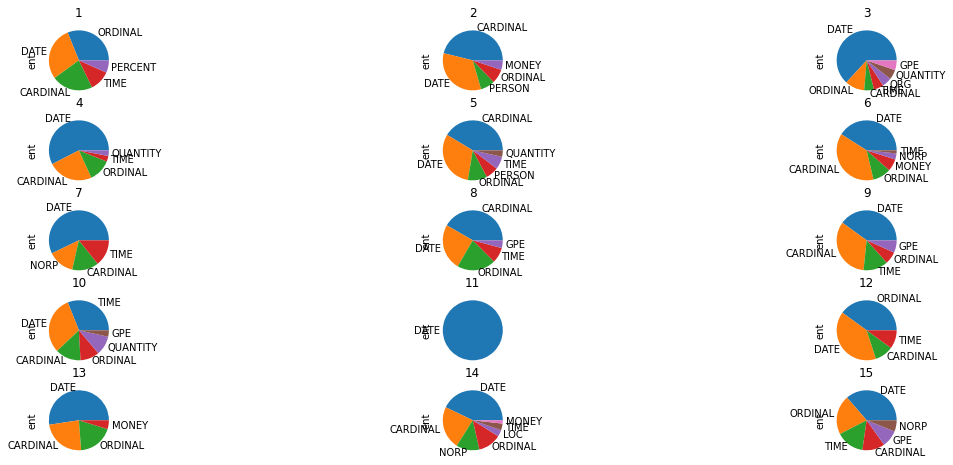

In [112]:
def ne_pie(article):
    nlp = spacy.load('en_core_web_sm')
    doc = nlp(article)
    ne = [(ent.text, ent.label_) for ent in doc.ents]
    ne_df = pd.DataFrame(ne,columns=['word','ent'])
    return ne_df.ent.value_counts().plot(kind='pie');

for index, speech in enumerate(speech_clean_3.transcript.iloc[:15]):
    plt.subplot(5, 3, index+1)
    ne_pie(speech)
    plt.title(index+1)
    
plt.show()

In [ ]:
# More variance. May look into this later.

#### C. Using polyglot library (multilingual)

## 4. n-grams

Applications of n-grams:
* sentence completion
* spelling correction
* machine translation correction

#### Build n-gram models using CountVectorizer

In [128]:
# Generate n-grrams upto n=3
vectorizer_ng3 = CountVectorizer(ngram_range=(1,3))
data_ng3 = vectorizer_ng3.fit_transform(speech_clean_3.transcript)

In [129]:
# There are 981298 features now!
data_ng3.shape

(441, 981298)

In [134]:
# Generate n-grrams upto n=2
vectorizer_ng2 = CountVectorizer(ngram_range=(1,2))
data_ng2 = vectorizer_ng2.fit_transform(speech_clean_2.transcript)

In [135]:
# There are 328082 features now!
data_ng2.shape

(441, 328082)

In [136]:
# Document-Term Matrix based on speech_clean_2 (after stemming)
# columns: 36167 --> 328082 (~an order of magnitude of difference)
data_dtm = pd.DataFrame(data_ng2.toarray(), columns=vectorizer_ng2.get_feature_names())
data_dtm.index = speech_clean_4.index
data_dtm = data_dtm.iloc[:,:-3]
data_dtm

,aa,aa dont,aa meet,aa so,aahhhh,aahhhh but,aahhhh inhal,aaron,aaron and,aaron burrstyl,...,ôwe,ôwe never,ôwhat,ôwhat doe,ôyou,ôyou canõt,ôyou donõt,ôyouõr,ôyouõr not,über
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
436,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
437,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
438,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
439,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [152]:
# Quickly check word clouds
# Helpful for adding new stop words manually

data = data_dtm
# Find the top 30 words said in each speech
top_dict = {}
for c in data.columns:
    top = data[c].sort_values(ascending=False).head(30)
    top_dict[c]= list(zip(top.index, top.values))
    
words = []
for comedian in data.columns:
    top = [word for (word, count) in top_dict[comedian]]
    for t in top:
        words.append(t)

add_stop_words = ['like','youre','ive','im','really','id','ve','just','dont','thi','wa','say','know']
stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)
wc = WordCloud(stopwords=stop_words, background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42, collocation_threshold = 3) # collection_threshold: 1-50

data = data_dtm.transpose()

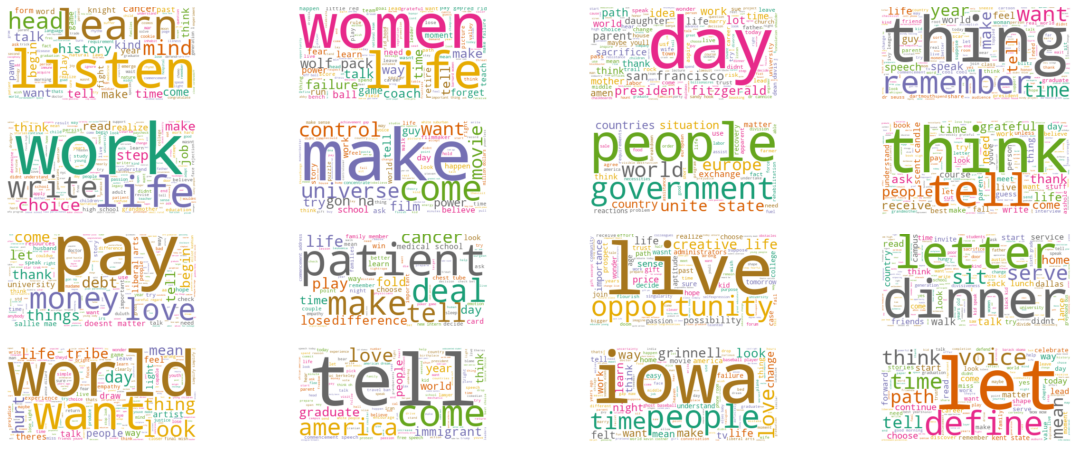

In [155]:
# Reset the output dimensions
plt.rcParams['figure.figsize'] = [20, 8]

# full_names = ['Ali Wong', 'Anthony Jeselnik', 'Bill Burr', 'Bo Burnham', 'Dave Chappelle', 'Hasan Minhaj',
#               'Jim Jefferies', 'Joe Rogan', 'John Mulaney', 'Louis C.K.', 'Mike Birbiglia', 'Ricky Gervais']

# Create subplots for each speech
for index, speech in enumerate(data.iloc[:,:16].columns):
    wc.generate(speech_clean_3.transcript[speech])
    
    plt.subplot(4, 4, index+1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
#     plt.title(full_names[index])
    
plt.show()